In [291]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
import csv
from decimal import Decimal
import math

0 & 50000.0 & $(976\pm7)e-3$ & $(-43.65\pm0.04)e3$ & 0.7e3 \\ \hline
1 & 50000.0 & $1.017\pm0.002$ & $100\pm40$ & 0.8e3 \\ \hline
2 & 50000.0 & $1.013\pm0.002$ & $(-3.53\pm0.04)e3$ & 0.6e3 \\ \hline
3 & 50000.0 & $1.007\pm0.002$ & $-190\pm50$ & 0.8e3 \\ \hline


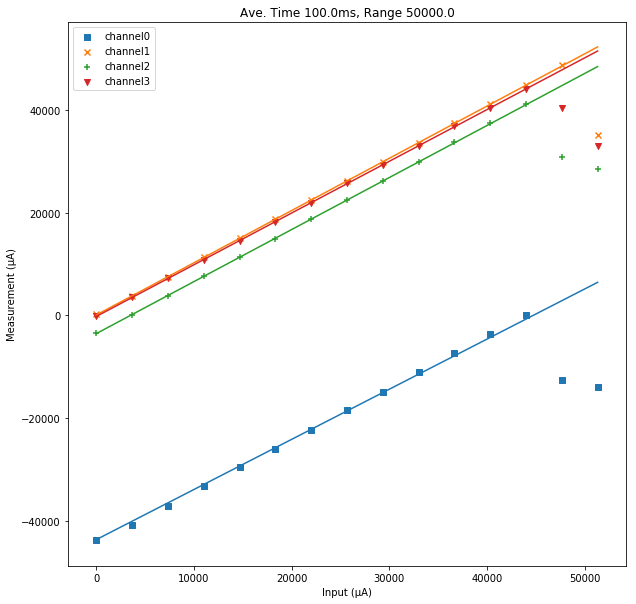

In [576]:
#CURRENT
range_values=[1,10,100,1000]
range_values=[50e3]
ave_time='100.0'
num_points=15
for range_value in range_values:
    for channel in range(4):
        x = []
        xo=[]
        y = []
        yo=[]
        dy = []
        dyo=[]
        markers= [',', 'x', '+', 'v','^', '<', '>', 's', 'd']
        line=0
        with open('../data/Serial#6_ver2/2_'+ave_time+'ms_current'+str(channel)+'.csv','r') as csvfile:
            plots = csv.reader(csvfile, delimiter=',')
            next(csvfile)
            line+=1
            next(csvfile)
            line+=1
            for row in plots:
                input=float(row[0])*(1e6)
                mean=float(row[3])
                std=float(row[4])
                rng=float(row[1])
                if rng == range_value:
                    if line%num_points < num_points:
                        x.append(input)
                        y.append(mean)
                        dy.append(std/num_points**0.5)
                    if input < range_value*0.8:
                        xo.append(input)
                        yo.append(mean)
                        dyo.append(std/num_points**0.5)
                line+=1
        p, c = np.polyfit(xo, yo, 1, w=dyo, cov=True)
        e = np.sqrt(np.diag(c))
        slope=sci_not(p[0],e[0],True)
        offset=sci_not(p[1],e[1],True)
        #print([p[1],e[1]])
        slope_str= '('+str(slope[0])+'\\pm'+str(slope[1])+')e'+str(slope[2]) if slope[2] != 0 else str(slope[0])+'\\pm'+str(slope[1])
        offset_str= '('+str(offset[0])+'\\pm'+str(offset[1])+')e'+str(offset[2]) if offset[2] != 0 else str(offset[0])+'\\pm'+str(offset[1])
        med_std=sci_not(dyo[round(len(dyo)/2)]*num_points**0.5,dyo[round(len(dyo)/2)]*num_points**0.5,True)
        std_str= str(med_std[0])+'e'+str(med_std[2]) if med_std[2] != 0 else str(med_std[0])
        
        print(str(channel)+' & '+str(range_value)+' & $'+slope_str+'$ & $'+offset_str+'$ & '+std_str+' \\\\ \\hline')
        slope=sci_not(p[0],e[0])
        offset=sci_not(p[1],e[1])

        plt.plot(np.array(x),offset[0]*10**offset[2]+np.array(x)*slope[0]*10**slope[2])
        plt.scatter(x,y, marker=markers[channel],label='channel'+str(channel))
    
    plt.legend()
    plt.xlabel('Input (\u03bcA)')
    plt.ylabel('Measurement (\u03bcA)')
    plt.title('Ave. Time '+ave_time+'ms, '+'Range '+str(range_value))
    plt.show()


0 & $(1000.09\pm0.02)e-3$ & $(1.5\pm0.1)e-3$ & 20e-6\\ \hline
1 & $(1000.09\pm0.01)e-3$ & $(1.5\pm0.08)e-3$ & 20e-6\\ \hline
2 & $(1000.09\pm0.008)e-3$ & $(1.5\pm0.07)e-3$ & 20e-6\\ \hline
3 & $(1000.09\pm0.007)e-3$ & $(1.5\pm0.06)e-3$ & 20e-6\\ \hline


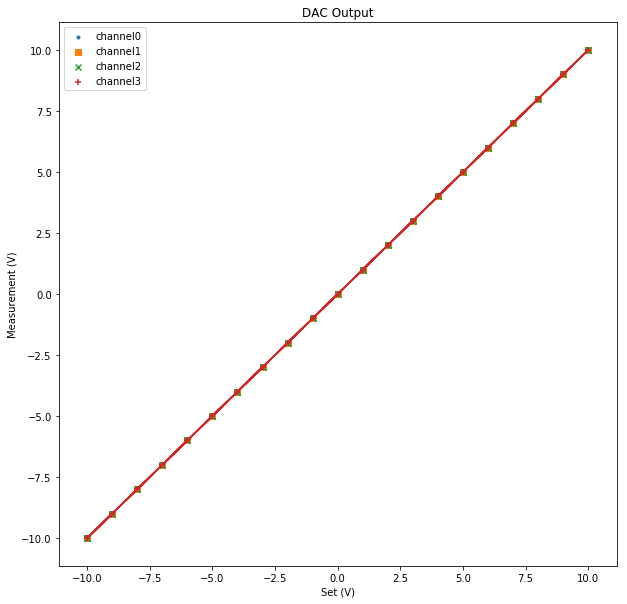

In [563]:
#DAC
x = []
y = []
dy = []
line=1
measured_values=[]
markers= ['.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
for channel in range(4):
    with open('../data/Serial#6_ver2/dac0.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        next(csvfile)
        for row in plots:
            measured_values.append(float(row[1]))
            if line % 3 == 0:
                set_value=float(row[0])
                x.append(set_value)
                y.append(np.average(measured_values))
                dy.append(np.std(measured_values,ddof=1)/3**0.5)
                #print([set_value,np.average(measured_values),np.std(measured_values,ddof=1)])
                measured_values=[]
            line+=1
        plt.scatter(x,y, marker=markers[channel],label='channel'+str(channel))
        #plt.errorbar(x,y,yerr=dy,fmt='none', marker=markers[channel],label='channel'+str(channel))
        p, c = np.polyfit(x, y, 1, w=dy, cov=True)
        e = np.sqrt(np.diag(c))
        #print([p,c,e])
        #print([p[0],e[0]])
        slope=sci_not(p[0],e[0])
        offset=sci_not(p[1],e[1])
        plt.plot(np.array(x),offset[0]*float(10)**offset[2]+np.array(x)*slope[0]*float(10)**slope[2])
        slope=sci_not(p[0],e[0],True)
        offset=sci_not(p[1],e[1],True)
        slope_str= '('+str(slope[0])+'\\pm'+str(slope[1])+')e'+str(slope[2]) if slope[2] != 0 else str(slope[0])+'\\pm'+str(slope[1])
        offset_str= '('+str(offset[0])+'\\pm'+str(offset[1])+')e'+str(offset[2]) if offset[2] != 0 else str(offset[0])+'\\pm'+str(offset[1])
        med_std=sci_not(dy[2]*3**0.5,dy[2]*3**0.5,True)
        std_str= str(med_std[0])+'e'+str(med_std[2]) if med_std[2] != 0 else str(med_std[0])
        print(str(channel)+' & $'+slope_str+'$ & $'+offset_str+'$ & '+std_str+'\\\\ \\hline')

plt.legend()
plt.xlabel('Set (V)')
plt.ylabel('Measurement (V)')
#plt.axis([-11, 11, -0.004, 0.003])
plt.title('DAC Output')
plt.show()

In [509]:
def myround(x, base):
    rounded=np.sign(x)*round(np.abs(x/base))*base
    return int(rounded)
def sci_not(value,uncertainty,Str=False):
    sigfig=10
    arg='%.'+str(sigfig)+'e'
    v=str(arg % Decimal(value)).split('e')
    u=str(arg % Decimal(uncertainty)).split('e')
    v[0]=float(v[0])
    u[0]=float(u[0])
    v[1]=int(v[1])
    u[1]=int(u[1])
    v.append(0)
    u.append(1)
    min=u
    max=v
    if v[1] < u[1]:
        min=v
        max=u
    mag=min[1]
    engi_mag = myround((min[1]+max[1])/2,3)
    mi = round(min[0])
    mx = round(max[0],np.abs(max[1]-min[1]))
    
    mi = round(mi*float(10)**(min[1]-engi_mag),np.abs(min[1]-engi_mag))
    mx = round(mx*float(10)**(max[1]-engi_mag),np.abs(min[1]-engi_mag))

    out=[mx,mi,engi_mag]
    if min[2]==0:
        out=[mi,mx,engi_mag]
    if Str==True:
        return ['%g'% out[0],'%g'% out[1],out[2]]
    return out
print(sci_not(-2069.85822426581, 4.181127959446867))

[-2070.0, 4.0, 0]


No handles with labels found to put in legend.


$(1027.4\pm0.1)e-3$ & $(196\pm1)e-3$ & 0.4e-3\\ \hline


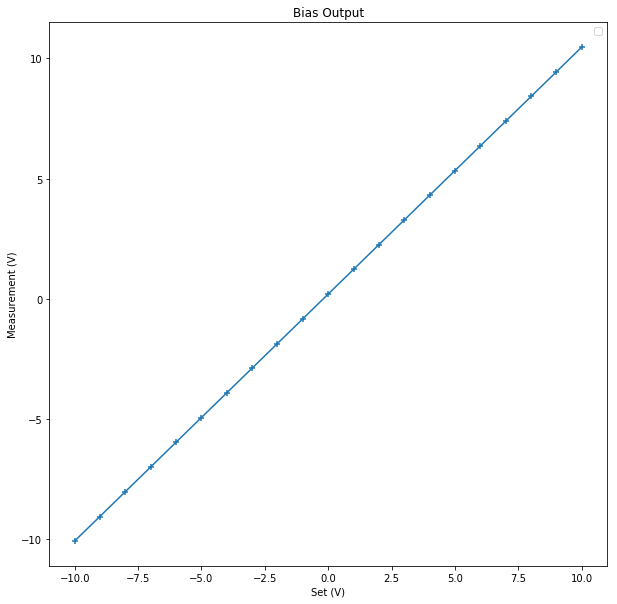

In [565]:
#BIAS
x = []
y = []
dy = []
line=1
measured_values=[]
markers= ['.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
with open('../data/Serial#6_ver2/bias.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(csvfile)
    for row in plots:
        measured_values.append(float(row[2]))
        if line % 3 == 0:
            set_value=float(row[0])
            x.append(set_value)
            y.append(np.average(measured_values))
            dy.append(np.std(measured_values,ddof=1)/3**0.5)
            #print([set_value,np.average(measured_values),np.std(measured_values,ddof=1)])
            measured_values=[]
        line+=1
    plt.scatter(x,y, marker=markers[channel])
    p, c = np.polyfit(x, y, 1, w=dy, cov=True)
    e = np.sqrt(np.diag(c))
    slope=sci_not(p[0],e[0])
    offset=sci_not(p[1],e[1])
    plt.plot(np.array(x),offset[0]*10**offset[2]+np.array(x)*slope[0]*10**slope[2])
    slope=sci_not(p[0],e[0],True)
    offset=sci_not(p[1],e[1],True)
    slope_str= '('+str(slope[0])+'\\pm'+str(slope[1])+')e'+str(slope[2]) if slope[2] != 0 else str(slope[0])+'\\pm'+str(slope[1])
    offset_str= '('+str(offset[0])+'\\pm'+str(offset[1])+')e'+str(offset[2]) if offset[2] != 0 else str(offset[0])+'\\pm'+str(offset[1])
    med_std=sci_not(dy[2]*3**0.5,dy[2]*3**0.5,True)
    std_str= str(med_std[0])+'e'+str(med_std[2]) if med_std[2] != 0 else str(med_std[0])
    print('$'+slope_str+'$ & $'+offset_str+'$ & '+std_str+'\\\\ \\hline')
plt.legend()
plt.xlabel('Set (V)')
plt.ylabel('Measurement (V)')
#plt.axis([-11, 11, -0.004, 0.003])
plt.title('Bias Output')
plt.show()

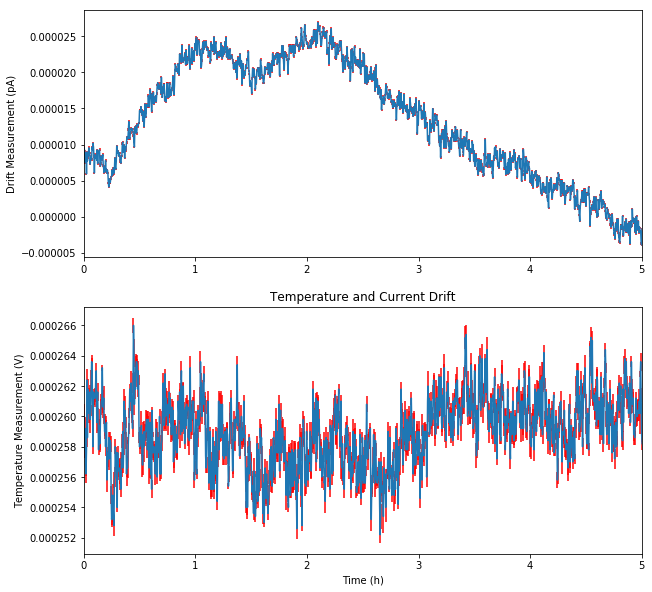

In [606]:
ranges=[1]
for range_value in ranges:
    x = []
    y = []
    y2=[]
    dy = []
    dy2=[]
    with open('../data/Serial#6_ver2/4_drift0.csv','r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        next(csvfile)
        for row in plots:
            time=float(row[0])/60/60
            mean=float(row[5])
            std=float(row[6])
            v=float(row[1])
            stdv=float(row[2])
            if float(row[3]) == range_value:
                x.append(time)
                y.append(mean)
                dy.append(std/(1000**0.5))
                y2.append(v)
                dy2.append(stdv/(5**0.5))

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
plt.title('Temperature and Current Drift')
ax1.errorbar(x,y,yerr=dy,fmt='none',ecolor='red')
ax1.plot(x,y)
ax2.set_xlabel('Time (h)')
ax1.set_ylabel('Drift Measurement (pA)')

ax2.errorbar(x,y2,yerr=dy2,fmt='none',ecolor='red')
ax2.plot(x,y2)
ax2.set_ylabel('Temperature Measurement (V)')
plt.xlim([0,5])

plt.show()